In [1]:
# 각 코드 셀의 실행시간 측정 모듈
!pip install ipython-autotime

%load_ext autotime

time: 1.63 ms (started: 2022-03-25 14:54:13 +00:00)


* M4 original dataset download and extract

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 22.4 s (started: 2022-03-25 14:54:15 +00:00)


* clone codes & import

In [16]:
# 강제 폴더 삭제
!rm -rf "/content/results/m4/interpretable"

time: 218 ms (started: 2022-03-25 15:04:49 +00:00)


In [3]:
!git clone https://github.com/TaeniKim/nbeats_reproduce.git

Cloning into 'nbeats_reproduce'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 69 (delta 28), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
Checking out files: 100% (21/21), done.
time: 11.8 s (started: 2022-03-25 14:54:38 +00:00)


In [4]:
# make result directorys
!mkdir /content/datasets/
!mkdir /content/datasets/m4/
!mkdir /content/results/
!mkdir /content/results/m4/
!mkdir /content/results/m4/generic
!mkdir /content/results/m4/interpretable

time: 665 ms (started: 2022-03-25 14:54:49 +00:00)


In [5]:
from nbeats_reproduce import nbeatsrepro

time: 5.8 s (started: 2022-03-25 14:54:50 +00:00)


In [6]:
# Set Config
m4cfg = nbeatsrepro.M4Config()

time: 824 µs (started: 2022-03-25 14:54:56 +00:00)


In [13]:
# Test config
m4cfg.lookbacks = [2, 7]
m4cfg.iterations = {'Yearly': 1500,
                    'Quarterly': 1500,
                    'Monthly': 1500,
                    'Weekly': 500,
                    'Daily': 500,
                    'Hourly': 500
                    }

time: 2.1 ms (started: 2022-03-25 15:03:34 +00:00)


In [14]:
# M4 Dataset
m4cfg.pathDatasetOrg = r"/content/nbeats_reproduce/datasets/m4/"
m4cfg.pathDatasetDump = r"/content/datasets/m4/"
m4cfg.pathResult = r"/content/results/m4/"

m4dataset = nbeatsrepro.M4Dataset(path_org = m4cfg.pathDatasetOrg, path_dump = m4cfg.pathDatasetDump)

Skip train dataset process... train.npz
Skip test dataset process... test.npz
time: 2.28 s (started: 2022-03-25 15:03:49 +00:00)


In [12]:
# 강제 폴더 삭제
!rm -rf "/content/steps/generic-Yearly-2-MASE"

time: 389 ms (started: 2022-03-25 15:03:27 +00:00)


In [17]:
# M4 generic experiments
nbeatsrepro.m4experiments(m4cfg, m4dataset, 'generic')
!cp -av '/content/results/m4/generic' '/content/drive/MyDrive/Colab Notebooks/N-BEATS/results/m4/'

create directory: 
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_100.pth
iter:100/1500 	 loss:1.576
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_200.pth
iter:200/1500 	 loss:1.604
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_300.pth
iter:300/1500 	 loss:1.661
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_400.pth
iter:400/1500 	 loss:1.608
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_500.pth
iter:500/1500 	 loss:1.497
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_600.pth
iter:600/1500 	 loss:1.428
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_700.pth
iter:700/1500 	 loss:1.567
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_800.pth
iter:800/1500 	 loss:1.383
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_900.pth
iter:900/1500 	 loss:1.485
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_1000.pth
iter:1000/1500 	 loss:1.551
Save Model: ./steps/generic-Yearly-2-MASE/weight_iter_1100.pth
iter:1100/1500 	 loss:1.49

In [18]:
# M4 interpritable experiments
nbeatsrepro.m4experiments(m4cfg, m4dataset, 'interpretable')
!cp -av '/content/results/m4/interpretable' '/content/drive/MyDrive/Colab Notebooks/N-BEATS/results/m4/'

create directory: 
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_100.pth
iter:100/1500 	 loss:1.813
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_200.pth
iter:200/1500 	 loss:1.661
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_300.pth
iter:300/1500 	 loss:1.665
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_400.pth
iter:400/1500 	 loss:1.592
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_500.pth
iter:500/1500 	 loss:1.495
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_600.pth
iter:600/1500 	 loss:1.525
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_700.pth
iter:700/1500 	 loss:1.616
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_800.pth
iter:800/1500 	 loss:1.521
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_900.pth
iter:900/1500 	 loss:1.669
Save Model: ./steps/interpretable-Yearly-2-MASE/weight_iter_1000.pth
iter:1000/1500 	 loss:1.533
Save Model: ./steps/interpret

In [19]:
!cp -av '/content/steps' '/content/drive/MyDrive/Colab Notebooks/N-BEATS/'

'/content/steps/generic-Yearly-2-MASE' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE'
'/content/steps/generic-Yearly-2-MASE/weight_iter_100.pth' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE/weight_iter_100.pth'
'/content/steps/generic-Yearly-2-MASE/weight_iter_200.pth' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE/weight_iter_200.pth'
'/content/steps/generic-Yearly-2-MASE/weight_iter_300.pth' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE/weight_iter_300.pth'
'/content/steps/generic-Yearly-2-MASE/weight_iter_400.pth' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE/weight_iter_400.pth'
'/content/steps/generic-Yearly-2-MASE/weight_iter_500.pth' -> '/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/generic-Yearly-2-MASE/weight_iter_500.pth'
'/content/steps/generic-Yearly-2-MASE/weight_iter_600.pth' -> '/content/drive/MyDrive/

In [20]:
# M4 Evaluate
import pandas as pd

eval_generic = nbeatsrepro.m4evaluate(m4cfg, m4dataset, 'generic')    
eval_generic = pd.DataFrame(eval_generic, index=['SMAPE', 'OWA'])

eval_interpretable = nbeatsrepro.m4evaluate(m4cfg, m4dataset, 'interpretable')
eval_interpretable = pd.DataFrame(eval_interpretable, index=['SMAPE', 'OWA'])

eval_ensemble = nbeatsrepro.m4evaluate(m4cfg, m4dataset, '*')    
eval_ensemble = pd.DataFrame(eval_ensemble, index=['SMAPE', 'OWA'])

100%|██████████| 36/36 [00:01<00:00, 21.79it/s]


ValueError: ignored

time: 3.64 s (started: 2022-03-25 16:52:39 +00:00)


In [ ]:
eval_generic

In [ ]:
eval_interpretable

In [ ]:
eval_ensemble

In [ ]:
import torch as t
from glob import glob
import pandas as pd

model_type='interpretable'
sp = ['Yearly', 'Quarterly', 'Monthly', 'Weekly', 'Daily', 'Hourly']
horizons = [6, 8, 18, 13, 14, 48]
lookbacks = [2, 3, 4, 5, 6, 7]
losses = ['MASE', 'MAPE', 'SMAPE']

idx = 0
seasonal_pattern = sp[idx]
horizon = horizons[idx]
insample_size = horizon * lookbacks[idx]

train_ids = nbeatsrepro.group_values(m4dataset.ids, m4dataset.groups, seasonal_pattern)
train_values = nbeatsrepro.group_values(m4dataset.trainset, m4dataset.groups, seasonal_pattern)
test_values = nbeatsrepro.group_values(m4dataset.testset, m4dataset.groups, seasonal_pattern)

timeseries = [ts for ts in train_values]

x, x_mask = map(nbeatsrepro.to_tensor, nbeatsrepro.last_insample_window(timeseries, insample_size))

f = r'/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/'
f += f'{model_type}-{sp[0]}-{lookbacks[0]}-{losses[0]}/'

lst=[]
for i in range(len(glob(f+'*'))):
    print('iter=', i)
    model = t.load(f+f'model_iter_{(i+1)*100}.pth')
    model.eval()
    forecasts=[]
    with t.no_grad():
        forecasts.extend(model(x, x_mask).cpu().detach().numpy())            
    
    forecasts_df = pd.DataFrame(forecasts,
                                columns=[f'V{j + 1}' for j in range(horizon)])
    forecasts_df.index = train_ids
    forecasts_df.index.name = 'id'
    lst.append(forecasts)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idx = 0
test = test_values[idx].astype(np.float64)
df = pd.DataFrame(test, columns=['Test'])

for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'
    df[col_name] = lst[i][idx]

time: 18.8 ms (started: 2022-03-25 07:10:36 +00:00)


In [ ]:
df

,Test,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10,iter11,iter12,iter13,iter14,iter15
0,7290.2,92154.101562,95909.625000,19879.986328,4080.361084,6387.614258,8337.830078,8379.794922,7855.119629,7485.160156,7675.328613,7474.209961,7102.560547,6966.569336,7026.234375,7349.310059
1,7392.6,-14131.687500,-11376.998047,8335.936523,4326.706055,8312.212891,8842.799805,8426.738281,7761.267578,7480.382812,7652.550781,7511.241699,7233.048340,7154.643066,7247.333008,7390.382324
2,7527.6,12021.666016,-7380.874023,8387.981445,5712.354004,8547.471680,8939.769531,8659.063477,8129.064941,7733.532715,7655.430176,7482.772949,7237.702148,7257.644043,7511.195312,7699.417480
3,7594.8,82664.546875,67370.320312,13057.232422,3220.427979,6388.923828,8360.356445,8522.883789,8190.476562,7861.755859,7728.226074,7495.148438,7205.096680,7174.368652,7381.063965,7612.059082
4,7720.7,48037.187500,48648.304688,13356.014648,4756.813477,7211.656250,8531.883789,8542.351562,8300.238281,8187.339844,8026.963867,7795.823242,7528.216797,7493.566406,7691.254883,7909.510254
5,7823.2,83989.742188,81529.421875,20465.263672,6970.101562,7405.306641,8617.717773,8644.099609,8326.975586,8018.172363,7840.123535,7566.714355,7228.453613,7179.835938,7398.124023,7749.006348


time: 22.6 ms (started: 2022-03-25 07:10:42 +00:00)


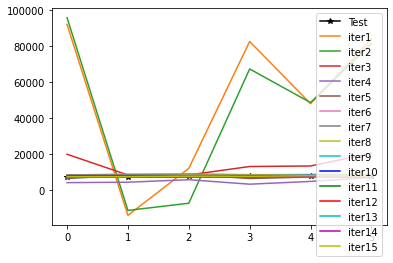

time: 283 ms (started: 2022-03-25 07:34:43 +00:00)


In [ ]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'b', 'g', 'r', 'c', 'm', 'y']
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

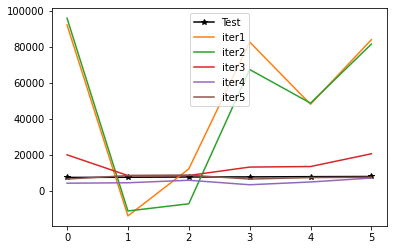

time: 432 ms (started: 2022-03-25 07:35:32 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(5):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

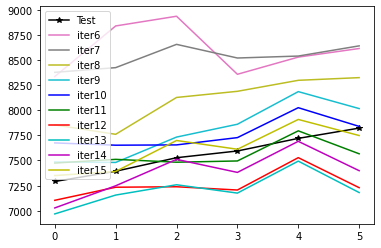

time: 275 ms (started: 2022-03-25 07:36:10 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(5, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

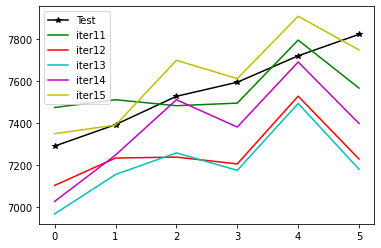

time: 202 ms (started: 2022-03-25 07:36:14 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(10, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

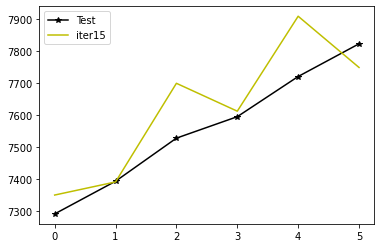

time: 781 ms (started: 2022-03-25 07:37:07 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))-1, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

In [ ]:
import torch as t
from glob import glob
import pandas as pd

model_type='generic'
sp = ['Yearly', 'Quarterly', 'Monthly', 'Weekly', 'Daily', 'Hourly']
horizons = [6, 8, 18, 13, 14, 48]
lookbacks = [2, 3, 4, 5, 6, 7]
losses = ['MASE', 'MAPE', 'SMAPE']

idx = 0
seasonal_pattern = sp[idx]
horizon = horizons[idx]
insample_size = horizon * lookbacks[idx]

train_ids = nbeatsrepro.group_values(m4dataset.ids, m4dataset.groups, seasonal_pattern)
train_values = nbeatsrepro.group_values(m4dataset.trainset, m4dataset.groups, seasonal_pattern)
test_values = nbeatsrepro.group_values(m4dataset.testset, m4dataset.groups, seasonal_pattern)

timeseries = [ts for ts in train_values]

x, x_mask = map(nbeatsrepro.to_tensor, nbeatsrepro.last_insample_window(timeseries, insample_size))

f = r'/content/drive/MyDrive/Colab Notebooks/N-BEATS/steps/'
f += f'{model_type}-{sp[0]}-{lookbacks[0]}-{losses[0]}/'

lst=[]
for i in range(len(glob(f+'*'))):
    print('iter=', i)
    model = t.load(f+f'model_iter_{(i+1)*100}.pth')
    model.eval()
    forecasts=[]
    with t.no_grad():
        forecasts.extend(model(x, x_mask).cpu().detach().numpy())            
    
    forecasts_df = pd.DataFrame(forecasts,
                                columns=[f'V{j + 1}' for j in range(horizon)])
    forecasts_df.index = train_ids
    forecasts_df.index.name = 'id'
    lst.append(forecasts)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idx = 0
test = test_values[idx].astype(np.float64)
df = pd.DataFrame(test, columns=['Test'])

for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'
    df[col_name] = lst[i][idx]

time: 17.2 ms (started: 2022-03-25 07:40:46 +00:00)


In [ ]:
df

,Test,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10,iter11,iter12,iter13,iter14,iter15
0,7290.2,40439.285156,23223.482422,14249.646484,8460.667969,3211.995117,3288.774658,4240.181641,5408.922852,6897.698242,8559.278320,8885.637695,8871.782227,8620.994141,8214.067383,7676.325195
1,7392.6,29753.626953,15530.291016,8653.435547,4645.589844,6504.991699,7856.144531,8099.654785,7800.528809,7269.104004,7016.562988,7042.670898,7143.187012,7259.972656,7375.347168,7405.723145
2,7527.6,30282.558594,18205.996094,12023.813477,8095.646973,5864.413574,6235.337891,7022.076660,7775.960938,8032.519531,7637.028320,7362.813477,7149.180664,7099.014160,7201.281738,7387.717285
3,7594.8,17754.490234,9203.857422,6201.743164,8204.294922,8724.851562,8345.452148,7832.732422,7405.174316,7178.903320,7398.392578,7365.134277,7251.521484,7172.024414,7198.271973,7280.769043
4,7720.7,20043.003906,12028.321289,8517.467773,7148.220703,8050.900879,8063.995117,7876.806152,7657.614746,7529.901855,7431.579102,7303.703125,7164.791992,7118.486816,7207.947266,7358.088379
5,7823.2,17042.804688,10079.458984,7492.588379,7550.692383,8454.738281,8522.365234,8380.325195,8140.010742,7959.187988,7767.171875,7557.555176,7304.073730,7121.633301,7081.797852,7152.015625


time: 23.8 ms (started: 2022-03-25 07:40:49 +00:00)


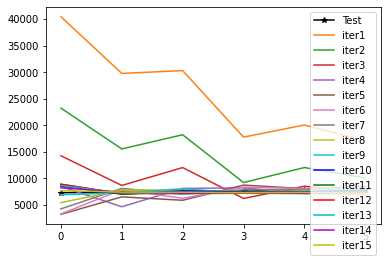

time: 316 ms (started: 2022-03-25 07:40:58 +00:00)


In [ ]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'b', 'g', 'r', 'c', 'm', 'y']
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

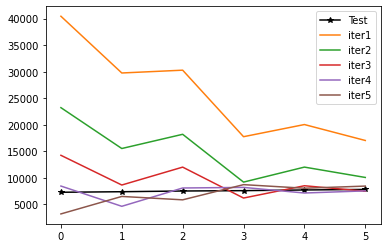

time: 192 ms (started: 2022-03-25 07:41:04 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(5):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

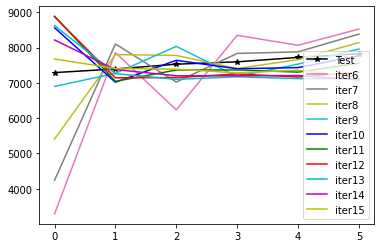

time: 240 ms (started: 2022-03-25 07:41:08 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(5, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

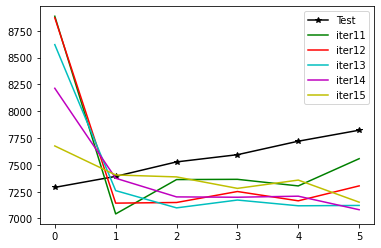

time: 400 ms (started: 2022-03-25 07:41:15 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(10, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

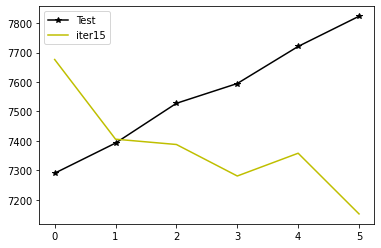

time: 179 ms (started: 2022-03-25 07:41:20 +00:00)


In [ ]:
#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))-1, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

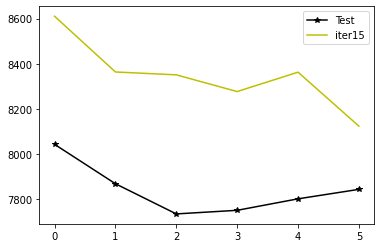

time: 230 ms (started: 2022-03-25 07:56:25 +00:00)


In [ ]:
idx = 50
test = test_values[idx].astype(np.float64)
df = pd.DataFrame(test, columns=['Test'])

for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'
    df[col_name] = lst[i][idx]

#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))-1, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()

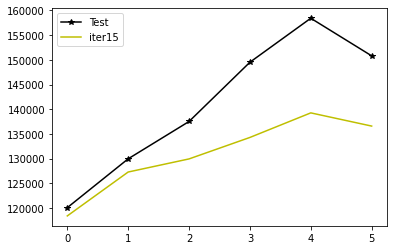

time: 408 ms (started: 2022-03-25 07:57:03 +00:00)


In [ ]:
idx = 9062
test = test_values[idx].astype(np.float64)
df = pd.DataFrame(test, columns=['Test'])

for i in range(len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'
    df[col_name] = lst[i][idx]

#plt.figure(figsize=(6, 18))
plt.plot(df['Test'], label='Test',marker='*', color='k')
for i in range(len(glob(f+'*'))-1, len(glob(f+'*'))):
    col_name = f'iter{(i+1)*100}'    
    plt.plot(df[col_name], label=col_name, color=colors[i+1])
plt.legend()
plt.show()